In [40]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt

In [41]:
df1 = pd.read_csv('features/Fingerprints/Train/All_fingerprints_train_MDCK.csv')
df2 = pd.read_csv('features/Descriptors/Train_3d_padel_curated_MDCK.csv')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1328
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 327
[LightGBM] [Info] Start training from score -5.671154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

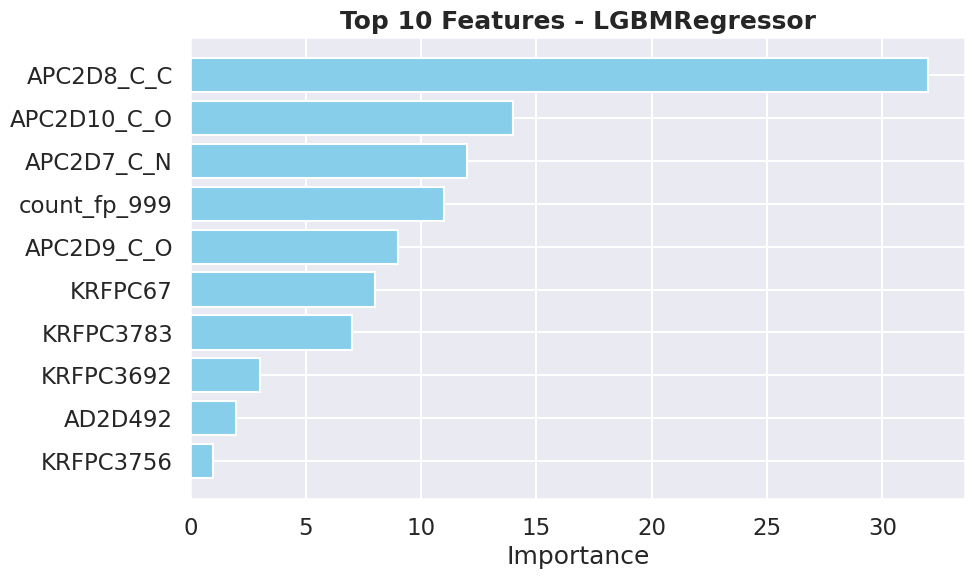

In [42]:
X_train_1 = df1.drop(columns=['ID', 'SMILES', 'Permeability'])
y_train_1 = df1['Permeability']

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_1, y_train_1)

lgb_importance = lgb_model.feature_importances_
lgb_feature_importance_df = pd.DataFrame({'Feature': X_train_1.columns, 'Importance': lgb_importance})
lgb_top_features = lgb_feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(lgb_top_features['Feature'], lgb_top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features - LGBMRegressor')
plt.gca().invert_yaxis()
plt.show()

In [43]:
lgb_feature_importance_df.to_csv('results/Fingerprints/Important_fingerprints_MDCK.csv')

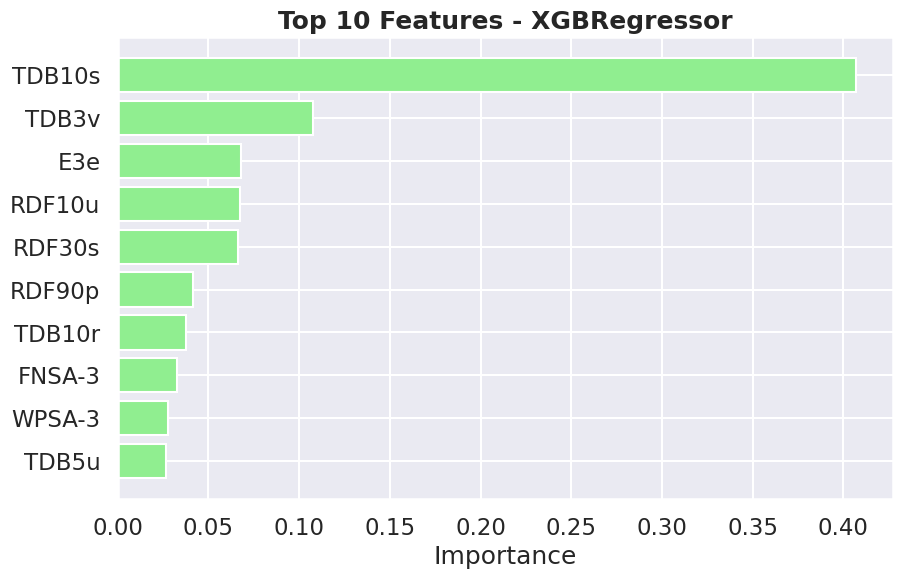

In [44]:
X_train_2 = df2.drop(columns=['ID', 'SMILES', 'Permeability'])
X_train_2 = X_train_2.select_dtypes(include=['number'])
y_train_2 = df2['Permeability']

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_2, y_train_2)

xgb_importance = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({'Feature': X_train_2.columns, 'Importance': xgb_importance})
xgb_top_features = xgb_feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(xgb_top_features['Feature'], xgb_top_features['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Top 10 Features - XGBRegressor')
plt.gca().invert_yaxis()
plt.show()


In [45]:
xgb_feature_importance_df.to_csv('results/Descriptors/Important_descriptors_MDCK.csv')

In [46]:
print("Top 10 Features - LGBMRegressor:")
print(lgb_top_features)

print("\nTop 10 Features - XGBRegressor:")
print(xgb_top_features)

Top 10 Features - LGBMRegressor:
            Feature  Importance
5422     APC2D8_C_C          32
5580    APC2D10_C_O          14
5345     APC2D7_C_N          12
3047   count_fp_999          11
5502     APC2D9_C_O           9
12788       KRFPC67           8
16504     KRFPC3783           7
16413     KRFPC3692           3
4587        AD2D492           2
16477     KRFPC3756           1

Top 10 Features - XGBRegressor:
    Feature  Importance
69   TDB10s    0.406833
22    TDB3v    0.107399
386     E3e    0.068051
130  RDF10u    0.067390
314  RDF30s    0.066490
266  RDF90p    0.041242
79   TDB10r    0.037420
94   FNSA-3    0.032494
97   WPSA-3    0.027548
4     TDB5u    0.026739


In [47]:
def combine_top_features(df1, df2, lgb_top_features, xgb_top_features):
   
    common_cols = ['ID', 'SMILES', 'Permeability']
    df1_selected = df1[common_cols + [col for col in lgb_top_features if col in df1.columns]]
    df2_selected = df2[common_cols + [col for col in xgb_top_features if col in df2.columns]]
    combined_df = pd.merge(df1_selected, df2_selected, on=common_cols, how='inner', suffixes=('_lgb', '_xgb'))
    return combined_df

In [48]:
combined_df = combine_top_features(df1, df2, lgb_top_features['Feature'].tolist(), xgb_top_features['Feature'].tolist())
combined_df.head(10)

,ID,SMILES,Permeability,APC2D8_C_C,APC2D10_C_O,APC2D7_C_N,count_fp_999,APC2D9_C_O,KRFPC67,KRFPC3783,...,TDB10s,TDB3v,E3e,RDF10u,RDF30s,RDF90p,TDB10r,FNSA-3,WPSA-3,TDB5u
0,1114,CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...,-4.940000,118.0,52.0,54.0,4,42.0,4.0,12.0,...,22.061051,543.993741,0.386204,30.888625,127.438227,105.145568,2.194046,-0.033899,60.000629,4.577209
1,1113,CC(C)C[C@@H]1NC(=O)[C@@H]2CCCN2C(=O)[C@@H](Cc2...,-5.820000,120.0,52.0,54.0,4,42.0,4.0,12.0,...,22.823888,542.949576,0.392251,33.781149,87.546176,91.971836,2.270684,-0.030091,66.352777,4.586469
2,1117,CC(C)C[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@H]2CCCN...,-5.650000,118.0,52.0,54.0,4,42.0,4.0,12.0,...,23.561729,542.548759,0.350146,32.804357,106.460858,100.275914,2.382925,-0.038931,69.704687,4.579912
3,1119,CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...,-6.250000,110.0,48.0,52.0,4,42.0,6.0,10.0,...,23.436481,556.987009,0.407208,32.243936,116.105838,87.593087,2.267538,-0.030663,81.384128,4.542256
4,2428,CCN1CC(=O)N[C@@H](CC(C)C)C(=O)N(C)[C@@H](C)C(=...,-5.350000,99.0,52.0,51.0,3,42.0,2.0,14.0,...,22.849524,525.415139,0.374716,31.610075,113.799092,105.727942,2.280468,-0.034845,58.781001,4.611307
5,2446,CCN1CC(=O)N[C@@H](CC(C)C)C(=O)N2CCC[C@@H]2C(=O...,-6.850000,97.0,52.0,51.0,1,40.0,2.0,14.0,...,24.245283,523.543955,0.340589,30.895376,114.138470,105.511400,2.436910,-0.031944,74.916850,4.601199
6,2445,CCN1CC(=O)N[C@@H](CC(C)C)C(=O)N2CCC[C@@H]2C(=O...,-5.270000,98.0,50.0,51.0,1,38.0,2.0,14.0,...,22.355678,516.596712,0.323369,32.483142,88.120200,104.316775,2.270201,-0.034480,72.693600,4.588929
7,2427,CCN1CC(=O)N[C@@H](CC(C)C)C(=O)N(C)[C@@H](C)C(=...,-6.340000,100.0,50.0,51.0,3,38.0,2.0,14.0,...,23.111696,517.962094,0.282097,30.502656,107.834794,89.245224,2.369623,-0.033849,64.479851,4.604640
8,8145,CCC[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@H](CC(C)C)...,-6.569578,81.0,47.0,39.0,2,36.0,4.0,9.0,...,23.670164,519.916496,0.357788,29.905678,108.896753,80.807210,2.284590,-0.033055,56.521030,4.497325
9,1107,CC(C)C[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@@H](C)N...,-4.610000,98.0,42.0,50.0,4,38.0,6.0,10.0,...,22.214581,527.169742,0.343230,32.031618,131.911199,83.856095,2.182582,-0.023484,64.324133,4.473814


In [49]:
combined_df.shape

(51, 23)

In [50]:
df1_test = pd.read_csv('features/Fingerprints/Test/All_fingerprints_test_MDCK.csv')
df2_test = pd.read_csv('features/Descriptors/Test_3d_padel_curated_MDCK.csv')

In [51]:
combined_test_df = combine_top_features(df1_test, df2_test, lgb_top_features['Feature'].tolist(), xgb_top_features['Feature'].tolist())
combined_test_df.head(10)

,ID,SMILES,Permeability,APC2D8_C_C,APC2D10_C_O,APC2D7_C_N,count_fp_999,APC2D9_C_O,KRFPC67,KRFPC3783,...,TDB10s,TDB3v,E3e,RDF10u,RDF30s,RDF90p,TDB10r,FNSA-3,WPSA-3,TDB5u
0,1120,CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...,-6.300000,134.0,50.0,58.0,4,46.0,6.0,10.0,...,22.452988,543.095253,0.370621,33.017118,133.682658,109.138879,2.273486,-0.029238,70.547153,4.539254
1,1118,CC(C)C[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@@H](Cc2...,-5.350000,106.0,48.0,52.0,4,42.0,6.0,10.0,...,22.786444,557.306898,0.352023,31.319939,108.094623,109.487851,2.194322,-0.021354,63.178418,4.541741
2,1121,CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H]...,-6.200000,94.0,48.0,46.0,2,38.0,0.0,12.0,...,25.225536,515.924278,0.370765,32.497761,112.431004,78.863602,2.461416,-0.042057,70.060821,4.643888
3,8133,CCC[C@@H]1NC(=O)CN(CC)C(=O)[C@H](CC(C)C)NC(=O)...,-5.965681,74.0,46.0,38.0,2,35.0,3.0,10.0,...,24.041650,517.612130,0.400271,28.310507,105.894785,72.237084,2.308360,-0.036882,64.125487,4.558068
4,8143,CCC[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@H](CC(C)C)...,-5.676306,76.0,44.0,39.0,3,35.0,4.0,9.0,...,23.323211,528.345889,0.423469,26.756093,117.836016,81.399815,2.268282,-0.030292,62.989997,4.522408
5,8119,CCC[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@H](CC(C)C)...,-5.516110,69.0,43.0,37.0,3,34.0,3.0,10.0,...,24.830465,525.779000,0.297522,26.297087,106.535286,68.279298,2.394541,-0.038661,62.811374,4.602144
6,6496,CC(=O)N1CCC[C@H]1C(=O)N(C)[C@H](CC(C)C)C(=O)N[...,-5.060000,86.0,51.0,42.0,2,42.0,2.0,9.0,...,24.156056,513.606376,0.397502,28.776895,116.050012,73.040078,2.254731,-0.037613,56.639807,4.656446
7,8168,CCOC(=O)[C@@H]1CSCC(=O)N[C@@H](CC)C(=O)N(C)[C@...,-5.977700,70.0,41.0,37.0,3,36.0,4.0,9.0,...,24.703176,535.270468,0.367393,25.676902,111.216619,88.717716,2.304894,-0.037946,61.392830,4.499600
8,8345,CCOC(=O)[C@@H]1CSCC(=O)N[C@@H](CC)C(=O)N(CC(C)...,-6.342777,70.0,41.0,37.0,3,36.0,4.0,9.0,...,25.637566,535.795291,0.269220,27.846268,102.072186,71.131763,2.366901,-0.037175,69.004415,4.547769
9,6423,CC(=O)N1CCC[C@@H]1C(=O)N(C)[C@@H](CC(C)C)C(=O)...,-7.210000,80.0,49.0,40.0,1,41.0,1.0,9.0,...,24.520044,503.937837,0.376111,31.411470,127.433765,84.007321,2.312718,-0.039458,55.177847,4.627305


In [52]:
combined_test_df.shape

(13, 23)

In [53]:
def add_label_column(df):
    df = df.copy()
    df['Label'] = (df['Permeability'] >= -6).astype(int)
    return df

In [54]:
combined_train_df_labeled = add_label_column(combined_df)
combined_test_df_labeled = add_label_column(combined_test_df)
print(combined_train_df_labeled.head(10))
print(combined_test_df_labeled.head(10))

     ID                                             SMILES  Permeability  \
0  1114  CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...     -4.940000   
1  1113  CC(C)C[C@@H]1NC(=O)[C@@H]2CCCN2C(=O)[C@@H](Cc2...     -5.820000   
2  1117  CC(C)C[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@H]2CCCN...     -5.650000   
3  1119  CC(C)C[C@@H]1NC(=O)[C@H](Cc2ccccc2)N(C)C(=O)[C...     -6.250000   
4  2428  CCN1CC(=O)N[C@@H](CC(C)C)C(=O)N(C)[C@@H](C)C(=...     -5.350000   
5  2446  CCN1CC(=O)N[C@@H](CC(C)C)C(=O)N2CCC[C@@H]2C(=O...     -6.850000   
6  2445  CCN1CC(=O)N[C@@H](CC(C)C)C(=O)N2CCC[C@@H]2C(=O...     -5.270000   
7  2427  CCN1CC(=O)N[C@@H](CC(C)C)C(=O)N(C)[C@@H](C)C(=...     -6.340000   
8  8145  CCC[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@H](CC(C)C)...     -6.569578   
9  1107  CC(C)C[C@@H]1NC(=O)[C@H](C)N(C)C(=O)[C@@H](C)N...     -4.610000   

   APC2D8_C_C  APC2D10_C_O  APC2D7_C_N  count_fp_999  APC2D9_C_O  KRFPC67  \
0       118.0         52.0        54.0             4        42.0      4.0   
1       1

In [55]:
combined_train_df_labeled.to_csv('data/Train_important_features_MDCK.csv', index=False)
combined_test_df_labeled.to_csv('data/Test_important_features_MDCK.csv', index=False)

In [56]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats

In [58]:
def correlation_heatmaps_diff_labels(df, label_col='Label', feature_cols=None):
  
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    df_label_0 = df[df[label_col] == 0][feature_cols]
    df_label_1 = df[df[label_col] == 1][feature_cols]

    corr_0 = df_label_0.corr()
    corr_1 = df_label_1.corr()

    
    mask_0 = np.triu(np.ones_like(corr_0, dtype=bool))
    mask_1 = np.triu(np.ones_like(corr_1, dtype=bool))

    
    bright_cmap = LinearSegmentedColormap.from_list(
        "bright_coolwarm",
        ["#000000", "#ffffff", "#FF0000"]
    )

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Heatmap for Label 0
    sns.heatmap(
        corr_0, ax=axes[0], cmap=bright_cmap, center=0, square=True, cbar=True, mask=mask_0,
        linewidths=0.8, linecolor='whitesmoke', annot=False, xticklabels=True, yticklabels=True,
        cbar_kws={"shrink": 0.8}
    )
    axes[0].set_title('Correlation Matrix - Label 0', fontsize=20, fontweight='700', pad=20)
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].tick_params(axis='y', rotation=0)

    # Heatmap for Label 1
    sns.heatmap(
        corr_1, ax=axes[1], cmap=bright_cmap, center=0, square=True, cbar=True, mask=mask_1,
        linewidths=0.8, linecolor='whitesmoke', annot=False, xticklabels=True, yticklabels=True,
        cbar_kws={"shrink": 0.8}
    )
    axes[1].set_title('Correlation Matrix - Label 1', fontsize=20, fontweight='700', pad=20)
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.show()


def boxplots_diff_labels(df, features, label_col='Label'):
 
    num_features = len(features)
    cols = 3  # Number of columns in the grid layout
    rows = (num_features + cols - 1) // cols  # Calculate rows needed

    plt.figure(figsize=(cols * 6, rows * 5))
    sns.set_style("whitegrid")

    for idx, feature in enumerate(features, 1):
        plt.subplot(rows, cols, idx)
        sns.boxplot(x=label_col, y=feature, data=df, hue=label_col, palette="Set2", legend=False)
        plt.title(f'Distribution of {feature} by Label', fontsize=14, fontweight='600', pad=12)
        plt.xlabel("Label", fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

        # Remove top and right spines for minimal look
        sns.despine(top=True, right=True)

    plt.tight_layout()
    plt.show()


def ttest_feature_tests(df, label_col='Label', feature_cols=None):
   
    
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    label_0_data = df[df[label_col] == 0]
    label_1_data = df[df[label_col] == 1]

    results = []
    alpha = 0.05  # Significance level
    for feature in feature_cols:
        class0_vals = label_0_data[feature].dropna()
        class1_vals = label_1_data[feature].dropna()
        
        # Perform T-Test
        t_stat, p_val = stats.ttest_ind(class0_vals, class1_vals, equal_var=False)
        
        # Print results for each feature
        print(f"Feature: {feature}")
        print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")
        
        # Interpretation
        if p_val < alpha:
            print("Result: Reject the null hypothesis - significant difference between the two groups.\n")
        else:
            print("Result: Fail to reject the null hypothesis - no significant difference between the two groups.\n")
        
        # Append results to the list
        results.append({'Feature': feature, 't-statistic': t_stat, 'p-value': p_val})

    results_df = pd.DataFrame(results).sort_values('p-value')
    return results_df


def anova_feature_tests(df, label_col='Label', feature_cols=None):
   
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    results = []
    alpha = 0.05  # Significance level
    for feature in feature_cols:
        group0_vals = df[df[label_col] == 0][feature].dropna()
        group1_vals = df[df[label_col] == 1][feature].dropna()
        
        # Perform ANOVA
        f_stat, p_val = stats.f_oneway(group0_vals, group1_vals)
        
        # Print results for each feature
        print(f"Feature: {feature}")
        print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_val:.4f}")
        
        # Interpretation
        if p_val < alpha:
            print("Result: Reject the null hypothesis - significant difference between the two groups.\n")
        else:
            print("Result: Fail to reject the null hypothesis - no significant difference between the two groups.\n")
        
        # Append results to the list
        results.append({'Feature': feature, 'F-statistic': f_stat, 'p-value': p_val})

    results_df = pd.DataFrame(results).sort_values('p-value')
    return results_df



def pca_visualization(df, label_col='Label', feature_cols=None):
   
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    features = df[feature_cols].fillna(0)
    labels = df[label_col]

    pca = PCA(n_components=2, random_state=42)
    components = pca.fit_transform(features)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(components[:,0], components[:,1], c=labels, cmap='Set1', alpha=0.7)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA of Features Colored by Label')
    plt.colorbar(scatter, label='Label')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def tsne_visualization(df, label_col='Label', feature_cols=None, perplexity=30):
    
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    features = df[feature_cols].fillna(0)
    labels = df[label_col]

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    embedding = tsne.fit_transform(features)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(embedding[:,0], embedding[:,1], c=labels, cmap='Set1', alpha=0.7)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title(f't-SNE visualization of features (perplexity={perplexity})')
    plt.colorbar(scatter, label='Label')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



def plot_top_feature_correlations(df, label_col='Label', permeability_col='Permeability',
                                       top_desc_features=None, top_fingerprint_features=None):
   

    assert top_desc_features and top_fingerprint_features, "Provide top descriptor and fingerprint feature lists"

    features = top_desc_features + top_fingerprint_features + [permeability_col, label_col]
    df_sub = df[features]

    corr_label0 = df_sub[df_sub[label_col] == 0].corr()[permeability_col].drop([permeability_col, label_col])
    corr_label1 = df_sub[df_sub[label_col] == 1].corr()[permeability_col].drop([permeability_col, label_col])
    
    corr_df = pd.DataFrame({
        'Feature': corr_label0.index,
        'Corr_Label_0': corr_label0.values,
        'Corr_Label_1': corr_label1.reindex(corr_label0.index).values
    })

    print("\nTop Features Correlation with Permeability by Label:\n")
    print(corr_df.to_string(index=False))

    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams.update({'font.family': 'DejaVu Sans', 'axes.titleweight': 'bold'})

    fig, ax = plt.subplots(figsize=(14, 10))

    bar_height = 0.35
    n_features = len(corr_df)
    y_indexes = np.arange(n_features)

    # Prepare normalization and colormaps for gradient coloring
    norm0 = Normalize(vmin=-1, vmax=1)  # Correlation range fixed for uniform color scale
    cmap_blue = LinearSegmentedColormap.from_list("blue_grad", ["#d0e6ff", "#003cff"])  # light to deep blue
    cmap_red = LinearSegmentedColormap.from_list("red_grad", ["#ffd6d6", "#ff0000"])    # light to deep red

    colors_label0 = [cmap_blue(norm0(val)) for val in corr_df['Corr_Label_0']]
    colors_label1 = [cmap_red(norm0(val)) for val in corr_df['Corr_Label_1']]

    # Plot bars side by side per feature with gap between groups (y positions shifted)
    ax.barh(y_indexes + bar_height/2, corr_df['Corr_Label_0'], height=bar_height,
            color=colors_label0, edgecolor='none', label='Label 0', align='center', linewidth=0)

    ax.barh(y_indexes - bar_height/2, corr_df['Corr_Label_1'], height=bar_height,
            color=colors_label1, edgecolor='none', label='Label 1', align='center', linewidth=0)

    ax.set_yticks(y_indexes)
    ax.set_yticklabels(corr_df['Feature'], fontsize=14)

    ax.set_xlabel('Correlation with Permeability', fontsize=16, labelpad=15)
    ax.set_title('Top Features Correlation with Permeability by Label', fontsize=24, pad=25)

    # X-axis grid with subtle dashed lines
    ax.xaxis.grid(True, linestyle='--', linewidth=0.8, alpha=0.6)
    ax.yaxis.grid(False)

    # Invert y-axis for highest correlations on top
    ax.invert_yaxis()

    # Minimal spines to reduce clutter
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Legend with modern styling and no frame
    legend = ax.legend(frameon=False, fontsize=16, loc='upper right', borderaxespad=0.5)

    plt.tight_layout()
    plt.show()

    return corr_df



In [59]:

feature_cols_train = [col for col in combined_train_df_labeled.columns if col not in ['ID', 'SMILES', 'Permeability', 'Label']]

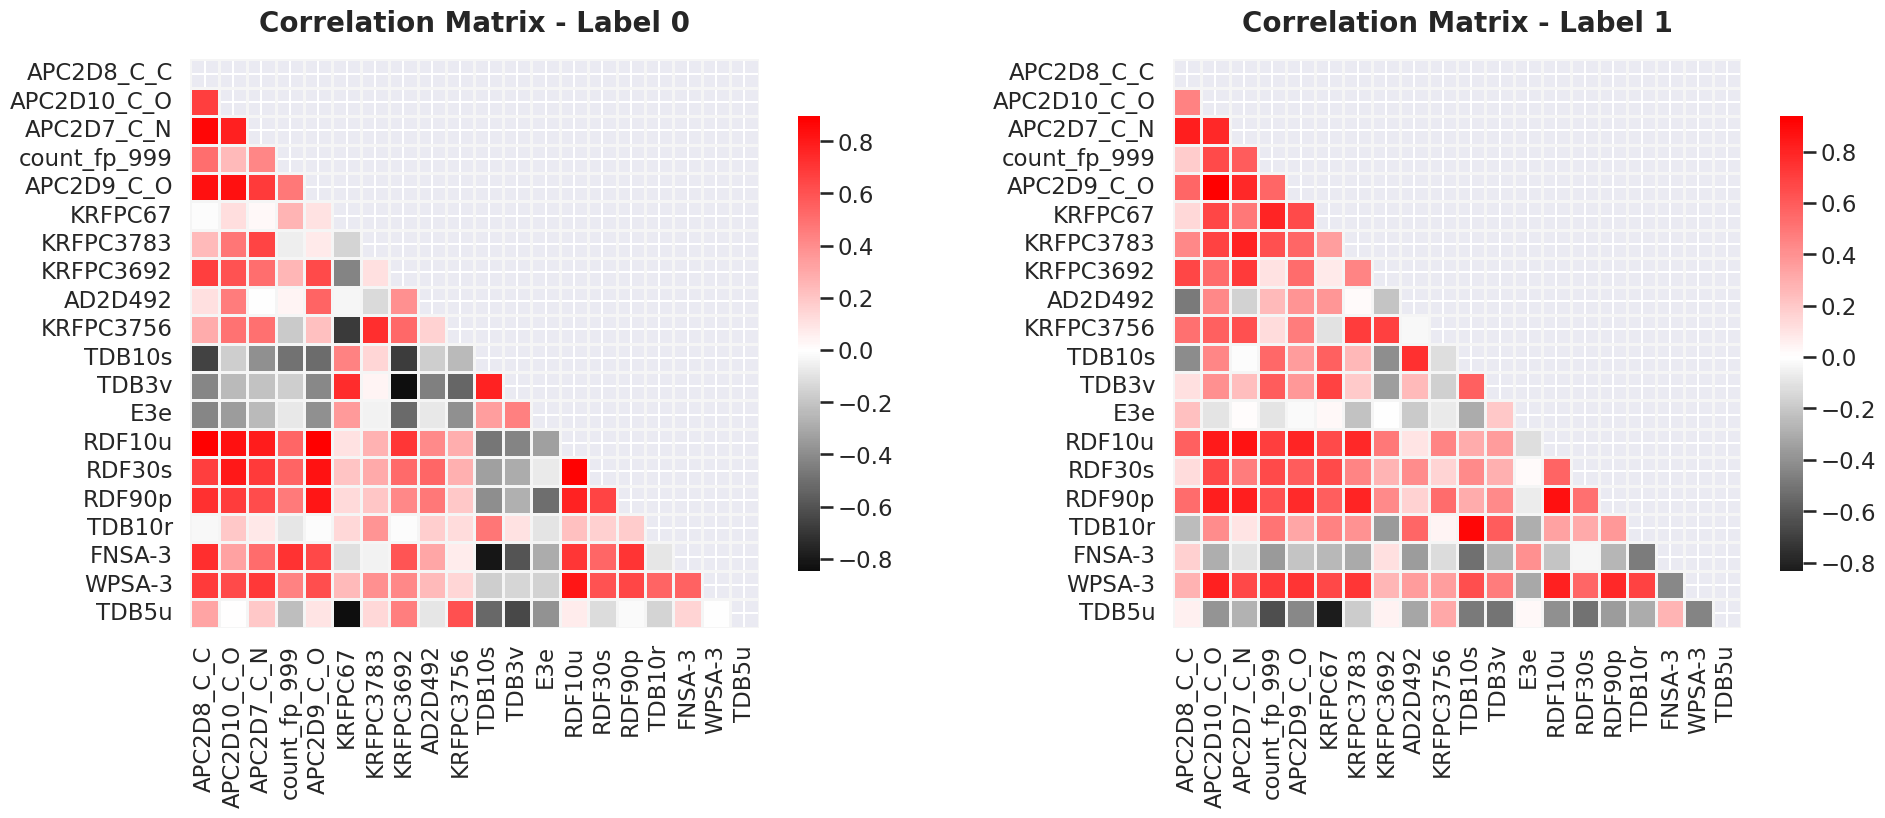

In [60]:

correlation_heatmaps_diff_labels(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train)

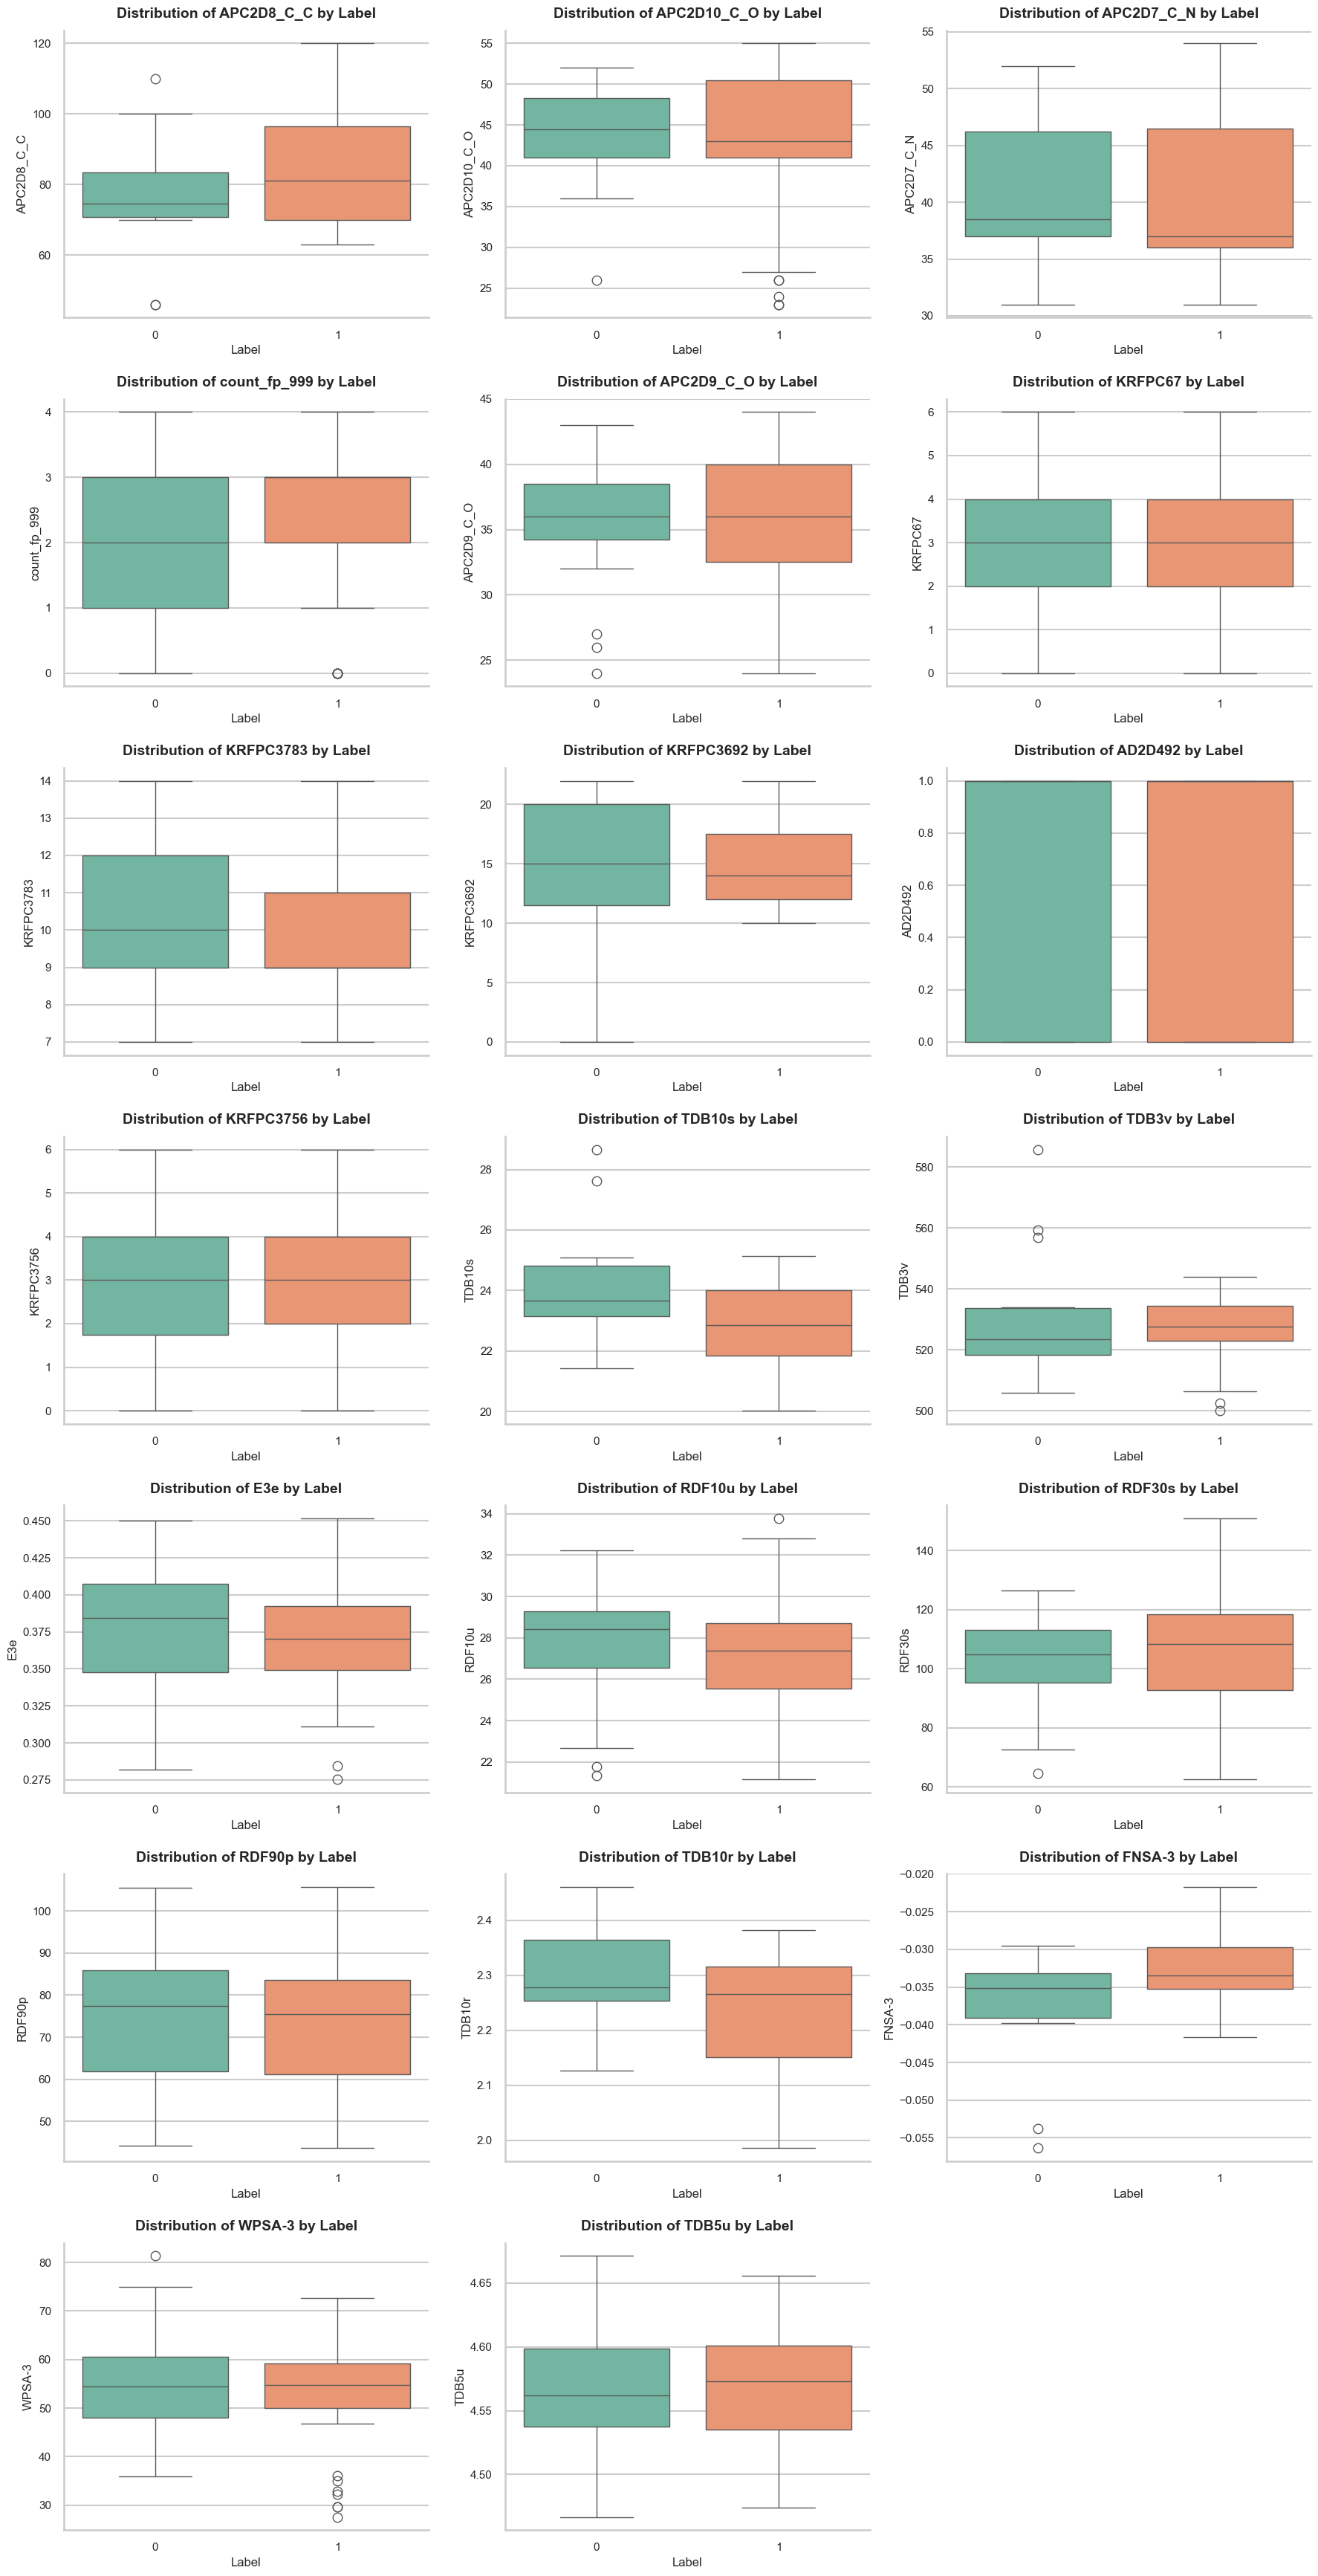

In [61]:
boxplots_diff_labels(combined_train_df_labeled, feature_cols_train, label_col='Label')


Top Features Correlation with Permeability by Label:

     Feature  Corr_Label_0  Corr_Label_1
  APC2D8_C_C     -0.226382      0.140609
 APC2D10_C_O     -0.435827     -0.511537
  APC2D7_C_N     -0.188776     -0.164059
count_fp_999      0.289767     -0.432160
  APC2D9_C_O     -0.430014     -0.383143
     KRFPC67      0.459531     -0.328052
   KRFPC3783     -0.119715     -0.400382
   KRFPC3692     -0.539940      0.076831
     AD2D492     -0.562055     -0.536856
   KRFPC3756     -0.531975     -0.257798
      TDB10s      0.269172     -0.703450
       TDB3v      0.586390     -0.303149
         E3e      0.080966      0.262726
      RDF10u     -0.346954     -0.397642
      RDF30s     -0.349270     -0.329957
      RDF90p     -0.044370     -0.445848
      TDB10r      0.026326     -0.722384
      FNSA-3     -0.039176      0.390198
      WPSA-3     -0.117006     -0.641381
       TDB5u     -0.473791      0.097866


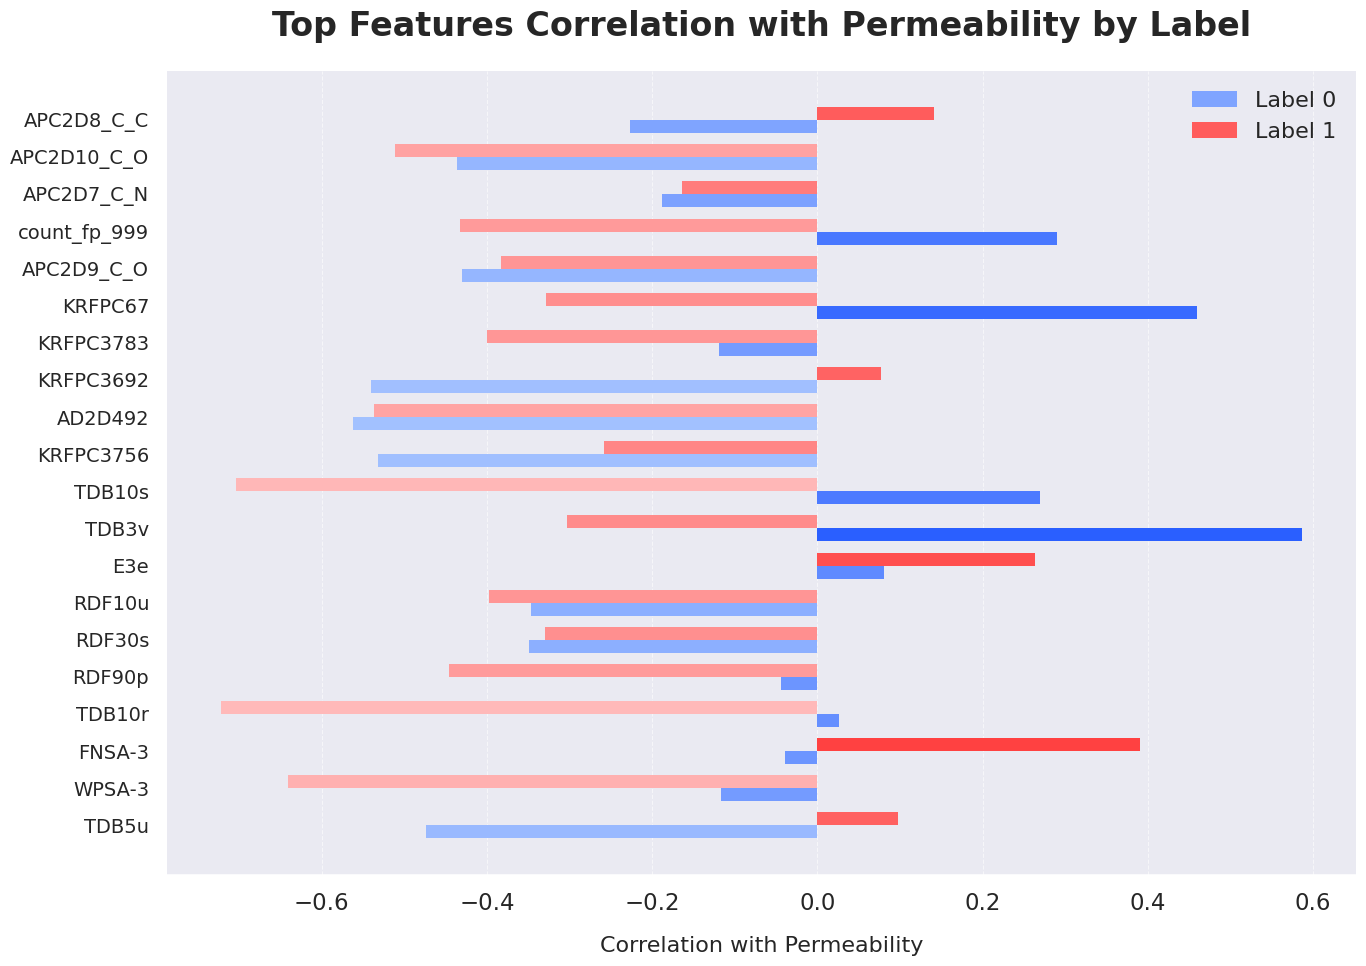

In [62]:
lgb_top_features_list = lgb_top_features['Feature'].to_list()
xgb_top_features_list = xgb_top_features['Feature'].to_list()
corr_df = plot_top_feature_correlations(
    combined_train_df_labeled,
    label_col='Label',
    permeability_col='Permeability',
    top_desc_features=lgb_top_features_list,
    top_fingerprint_features=xgb_top_features_list
)

In [63]:
ttest_df_train = ttest_feature_tests(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train)
print(ttest_df_train)

Feature: APC2D8_C_C
T-Statistic: -1.2954, P-Value: 0.2059
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D10_C_O
T-Statistic: 0.7016, P-Value: 0.4869
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D7_C_N
T-Statistic: -0.0565, P-Value: 0.9553
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: count_fp_999
T-Statistic: -0.9973, P-Value: 0.3264
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D9_C_O
T-Statistic: -0.0042, P-Value: 0.9967
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: KRFPC67
T-Statistic: 0.1074, P-Value: 0.9152
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: KRFPC3783
T-Statistic: 1.2471, P-Value: 0.2224
Result: Fail to reject

In [64]:
anova_df_train = anova_feature_tests(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train)
print(anova_df_train)

Feature: APC2D8_C_C
F-Statistic: 1.7572, P-Value: 0.1911
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D10_C_O
F-Statistic: 0.3784, P-Value: 0.5413
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D7_C_N
F-Statistic: 0.0029, P-Value: 0.9570
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: count_fp_999
F-Statistic: 0.9563, P-Value: 0.3329
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D9_C_O
F-Statistic: 0.0000, P-Value: 0.9967
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: KRFPC67
F-Statistic: 0.0118, P-Value: 0.9140
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: KRFPC3783
F-Statistic: 1.5731, P-Value: 0.2157
Result: Fail to reject the

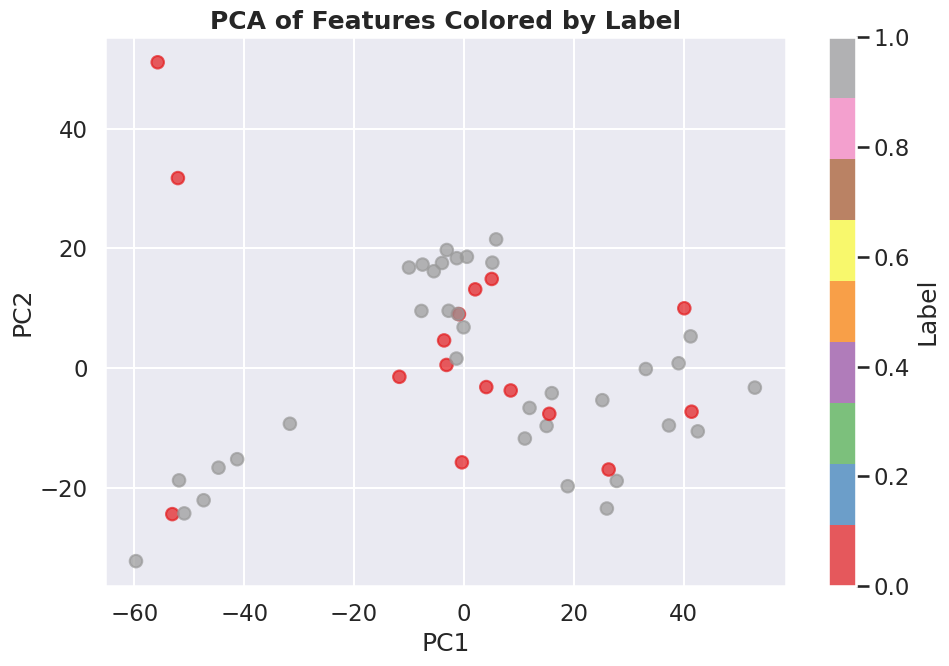

In [65]:

pca_visualization(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train)

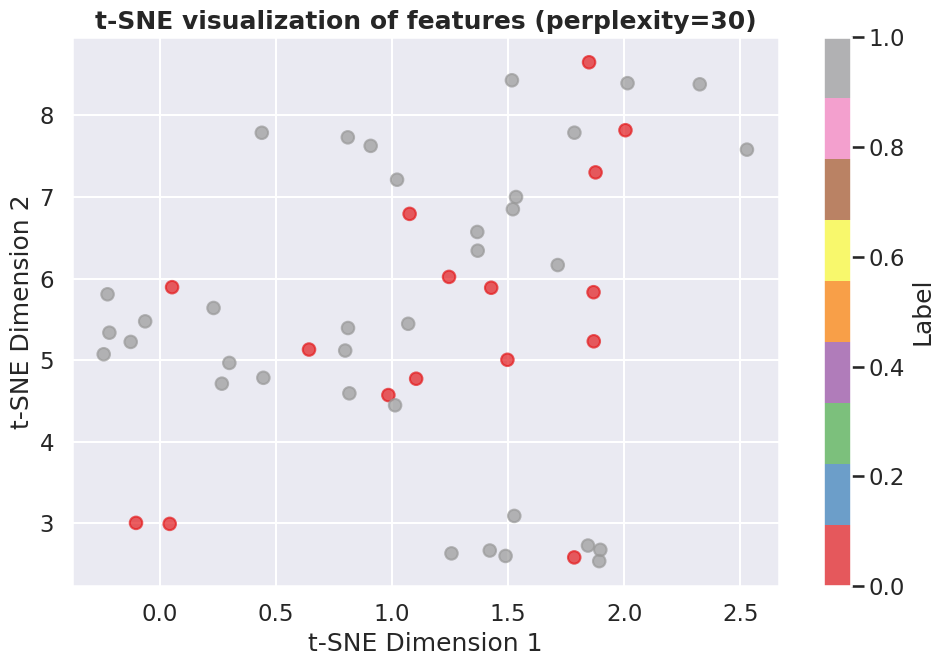

In [66]:
tsne_visualization(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train, perplexity=30)

In [67]:
feature_cols_test = [col for col in combined_test_df_labeled.columns if col not in ['ID', 'SMILES', 'Permeability', 'Label']]

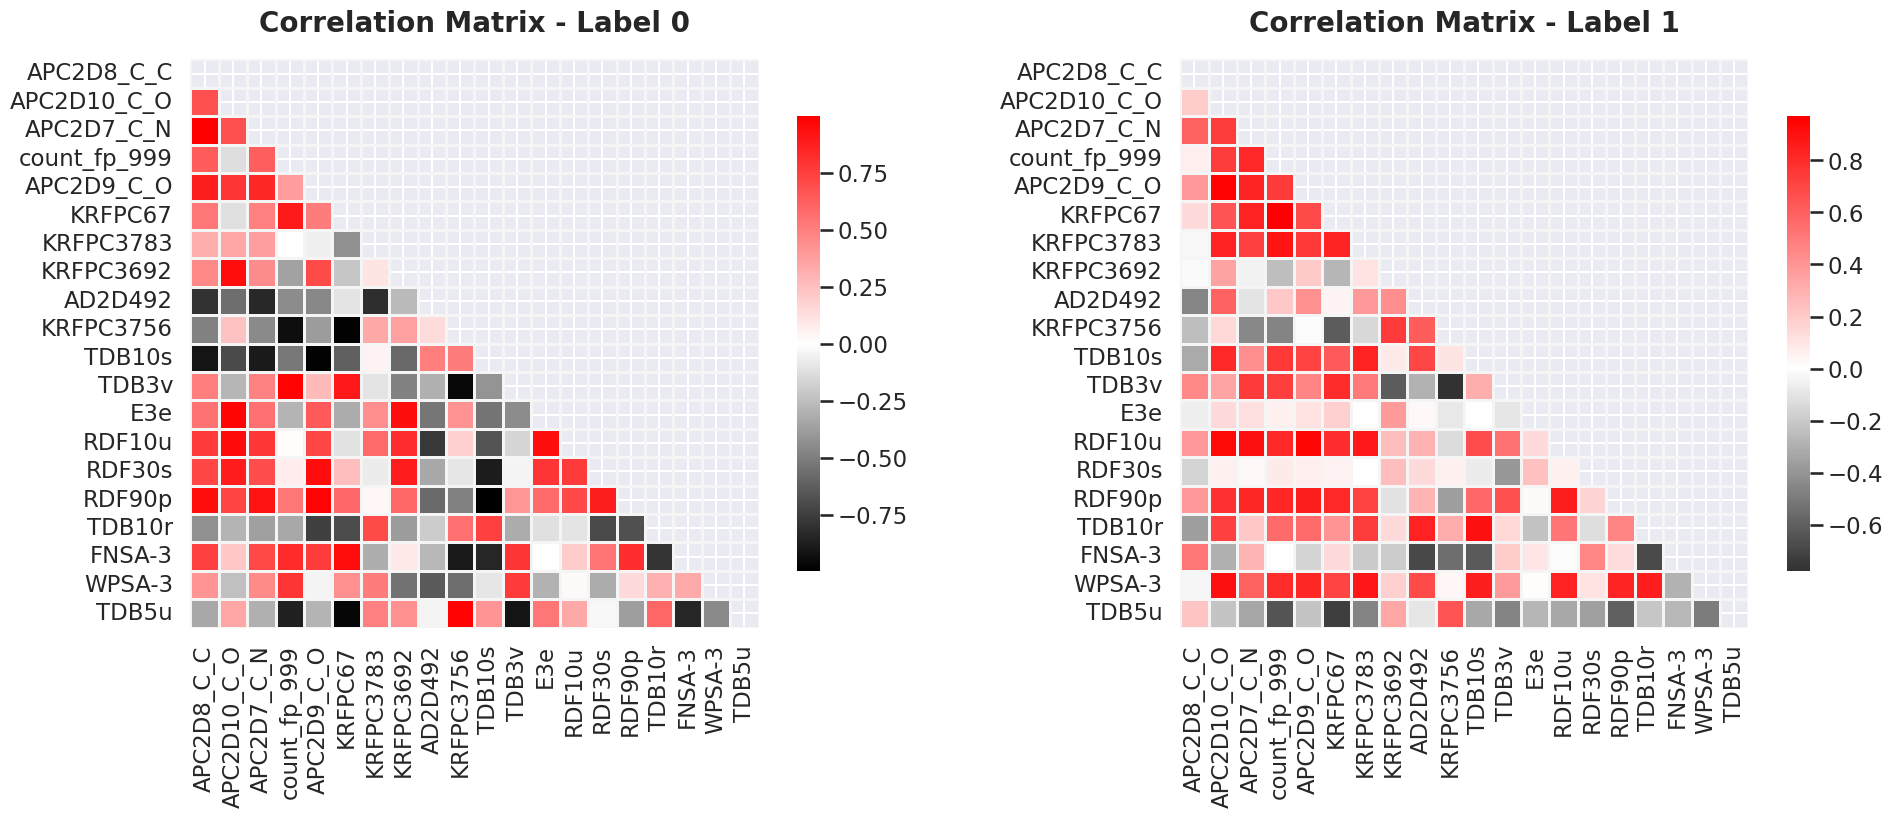

In [68]:
correlation_heatmaps_diff_labels(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test)

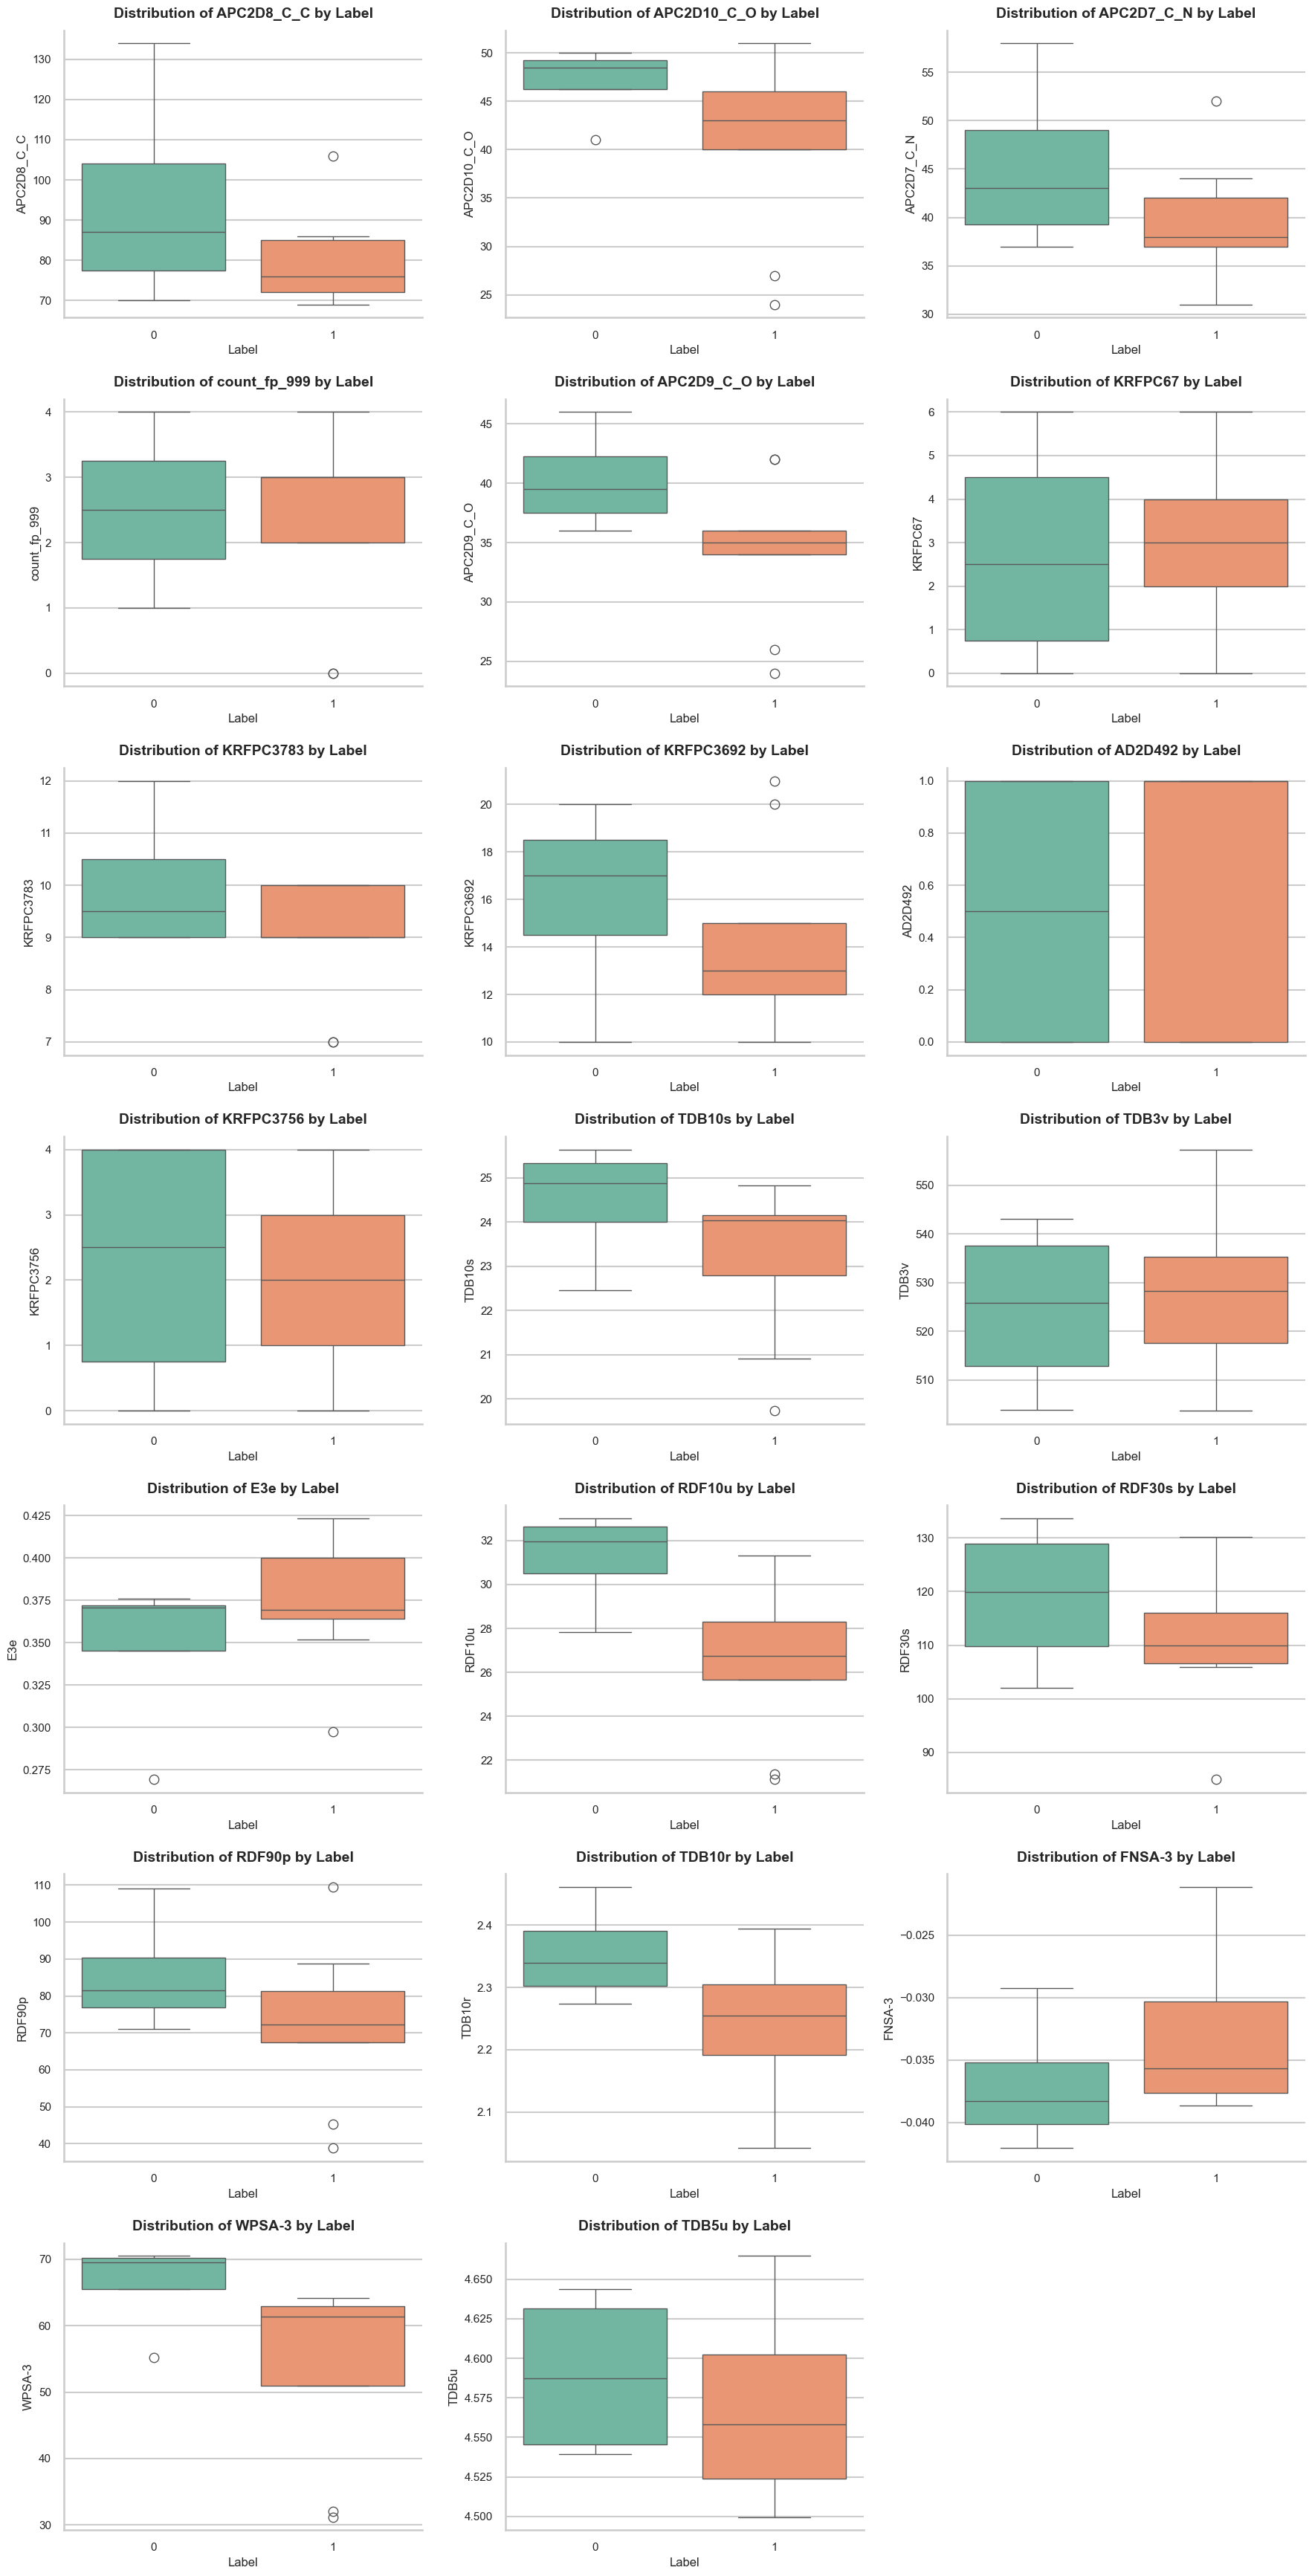

In [69]:
boxplots_diff_labels(combined_test_df_labeled, feature_cols_test, label_col='Label')


Top Features Correlation with Permeability by Label:

     Feature  Corr_Label_0  Corr_Label_1
  APC2D8_C_C      0.359299      0.286955
 APC2D10_C_O     -0.255098     -0.712442
  APC2D7_C_N      0.398897     -0.345808
count_fp_999      0.713125     -0.676656
  APC2D9_C_O     -0.118746     -0.594914
     KRFPC67      0.326673     -0.625257
   KRFPC3783      0.580118     -0.763586
   KRFPC3692     -0.557312     -0.100226
     AD2D492     -0.648863     -0.720970
   KRFPC3756     -0.470885      0.024125
      TDB10s     -0.014731     -0.818997
       TDB3v      0.694017     -0.298180
         E3e     -0.289902     -0.091596
      RDF10u      0.022903     -0.619381
      RDF30s     -0.381743     -0.056317
      RDF90p      0.067201     -0.699790
      TDB10r      0.414645     -0.830780
      FNSA-3      0.225561      0.393840
      WPSA-3      0.993430     -0.915451
       TDB5u     -0.359535      0.645527


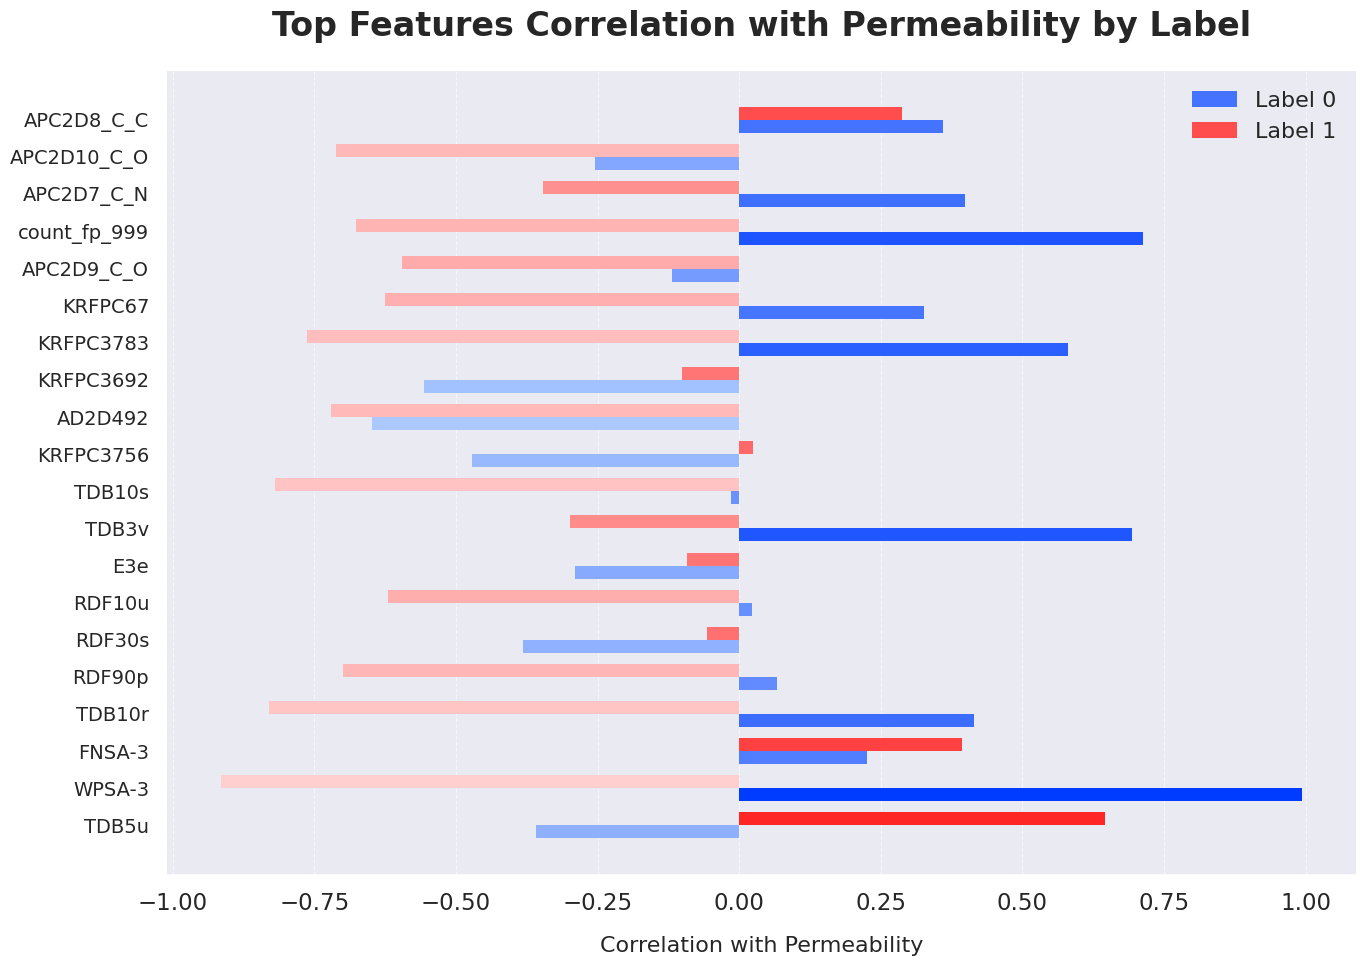

In [70]:
lgb_top_features_list = lgb_top_features['Feature'].to_list()
xgb_top_features_list = xgb_top_features['Feature'].to_list()
corr_df = plot_top_feature_correlations(
    combined_test_df_labeled,
    label_col='Label',
    permeability_col='Permeability',
    top_desc_features=lgb_top_features_list,
    top_fingerprint_features=xgb_top_features_list
)

In [71]:
ttest_df_test = ttest_feature_tests(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test)
print(ttest_df_test)

Feature: APC2D8_C_C
T-Statistic: 1.0326, P-Value: 0.3684
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D10_C_O
T-Statistic: 1.7858, P-Value: 0.1019
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D7_C_N
T-Statistic: 1.2022, P-Value: 0.2911
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: count_fp_999
T-Statistic: 0.2041, P-Value: 0.8443
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D9_C_O
T-Statistic: 2.0249, P-Value: 0.0767
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: KRFPC67
T-Statistic: -0.2314, P-Value: 0.8266
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: KRFPC3783
T-Statistic: 1.2247, P-Value: 0.2740
Result: Fail to reject th

In [72]:
anova_df_test = anova_feature_tests(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test)
print(anova_df_test)

Feature: APC2D8_C_C
F-Statistic: 2.0007, P-Value: 0.1849
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D10_C_O
F-Statistic: 1.8176, P-Value: 0.2047
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D7_C_N
F-Statistic: 1.9669, P-Value: 0.1884
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: count_fp_999
F-Statistic: 0.0368, P-Value: 0.8514
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D9_C_O
F-Statistic: 3.1238, P-Value: 0.1048
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: KRFPC67
F-Statistic: 0.0644, P-Value: 0.8043
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: KRFPC3783
F-Statistic: 1.6923, P-Value: 0.2199
Result: Fail to reject the

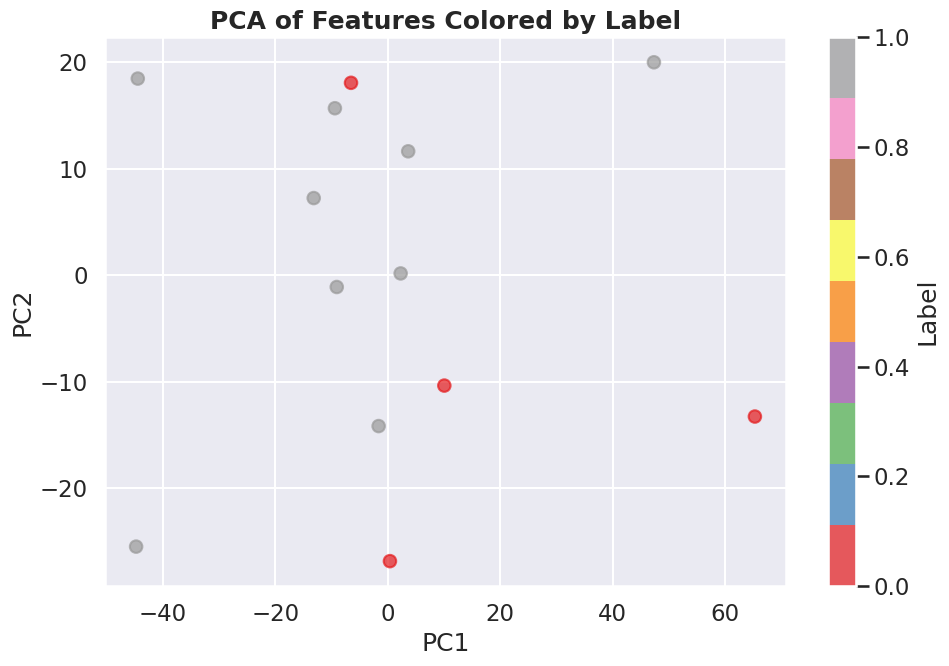

In [73]:
pca_visualization(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test)

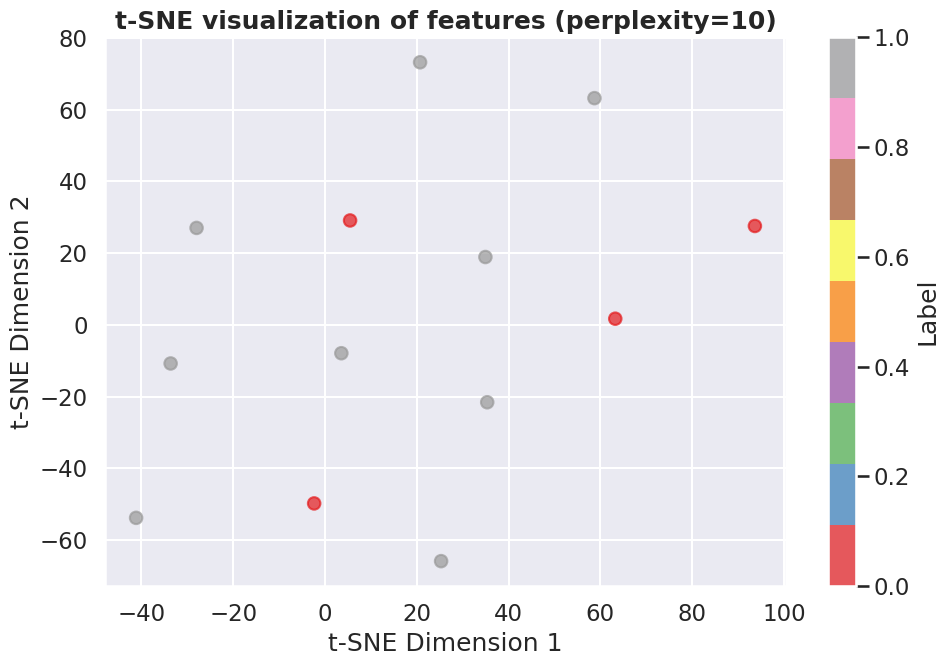

In [74]:
tsne_visualization(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test, perplexity=10)